In [1]:
import pandas as pd
import scipy
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_rand = pd.read_stata("/Users/cristianzuniga/Downloads/Chapter-1-Tables-1-3-1-4/Data/rand_initial_sample_2.dta")

In [3]:
df_rand.columns

Index(['person', 'site', 'instat', 'bfamily', 'bhh', 'xperson', 'baseld',
       'enrterm', 'enrdate', 'annd',
       ...
       'cap', 'capx', 'pfi', 'pfix', 'mhi', 'mhix', 'ghindx', 'ghindxx',
       'merge2', 'merge3'],
      dtype='object', length=364)

/Users/cristianzuniga/Library/Python/3.10/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='ghindxx', ylabel='Count'>

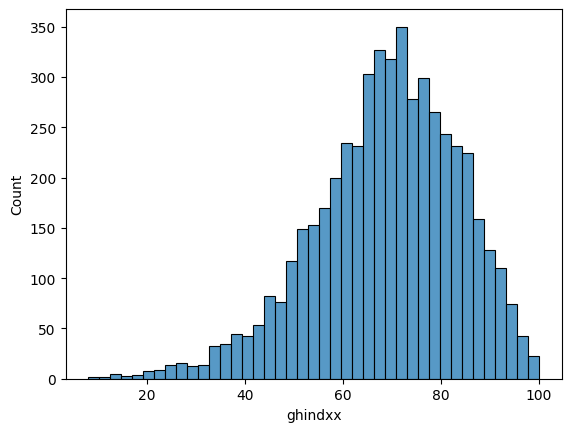

In [4]:
sn.histplot(data=df_rand, x='ghindxx')

In [5]:
df_rand['plan_original']

0        NaN
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
5882     7.0
5883    16.0
5884    18.0
5885    13.0
5886    11.0
Name: plan_original, Length: 5887, dtype: float64

In [6]:
df_rand['plantype']

0       NaN
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
5882    3.0
5883    4.0
5884    3.0
5885    2.0
5886    1.0
Name: plantype, Length: 5887, dtype: float32

In [7]:
#We'd like to compare the outcomes of two groups before and after the trial

#We'd like to know the ghindxx outcome of two different groups (free vs. coinsurance) and compare the overlap between the two groups before and ofter their treatments:
#Essentially what we would like to show is if a group has slightly better insurance, then their genreal health index will also increase

In [8]:
df_rand['plantype'].value_counts()

plantype
1.0    1295
3.0    1022
2.0     881
4.0     759
Name: count, dtype: int64

In [9]:
df_rand['ghindx'].isna().sum()

1528

In [10]:
df_rand[(df_rand['ghindx'].notna()) & ((df_rand['ghindxx'].notna()))]['plantype'].value_counts()

plantype
1.0    971
2.0    667
3.0    636
4.0    429
Name: count, dtype: int64

In [11]:
#Take a random sample from the group
df_free = df_rand[(df_rand['plantype'] == 4) & (df_rand['mhi'].notna()) & ((df_rand['mhix'].notna()))].sample(300)
df_coins = df_rand[(df_rand['plantype'] == 1) & ((df_rand['mhi'].notna())) & (df_rand['mhix'].notna())].sample(300)



In [12]:
df_rand

,person,site,instat,bfamily,bhh,xperson,baseld,enrterm,enrdate,annd,...,cap,capx,pfi,pfix,mhi,mhix,ghindx,ghindxx,merge2,merge3
0,,NaN,NaN,,,,,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,using only (2),master only (1)
1,MA250247,Dayton,1.0,KA100082,JA000082,MA250271,19740618,5.0,19750201,201,...,NaN,100.0,5.0,5.0,95.000000,94.699997,NaN,71.599998,matched (3),matched (3)
2,MA250255,Dayton,1.0,KA100082,JA000082,MA250271,19740618,5.0,19750201,201,...,NaN,100.0,5.0,5.0,93.800003,76.099998,NaN,69.300003,matched (3),matched (3)
3,MA250263,Dayton,1.0,KA100082,JA000082,MA250271,19740618,5.0,19750201,201,...,NaN,100.0,5.0,5.0,98.699997,96.800003,NaN,92.000000,matched (3),matched (3)
4,MA250271,Dayton,1.0,KA100082,JA000082,MA250271,19740618,5.0,19750201,201,...,NaN,100.0,5.0,5.0,96.300003,80.300003,NaN,73.900002,matched (3),matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,MH318679,Georgetown County,1.0,,,MH278093,,3.0,19790101,101,...,100.000000,NaN,5.0,NaN,85.099998,NaN,75.000000,NaN,matched (3),matched (3)
5883,MH318695,Georgetown County,1.0,,,MH318695,,3.0,19790101,101,...,83.300003,100.0,4.0,5.0,81.400002,86.199997,66.699997,85.199997,matched (3),matched (3)
5884,MH318758,Georgetown County,1.0,,,MH318758,,3.0,19790101,101,...,100.000000,100.0,5.0,5.0,85.099998,94.699997,78.400002,71.599998,matched (3),matched (3)
5885,MH318802,Georgetown County,1.0,,,MH318802,,3.0,19790101,101,...,83.300003,50.0,4.0,1.0,75.000000,71.800003,55.700001,37.500000,matched (3),matched (3)


/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_52512/3727931724.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


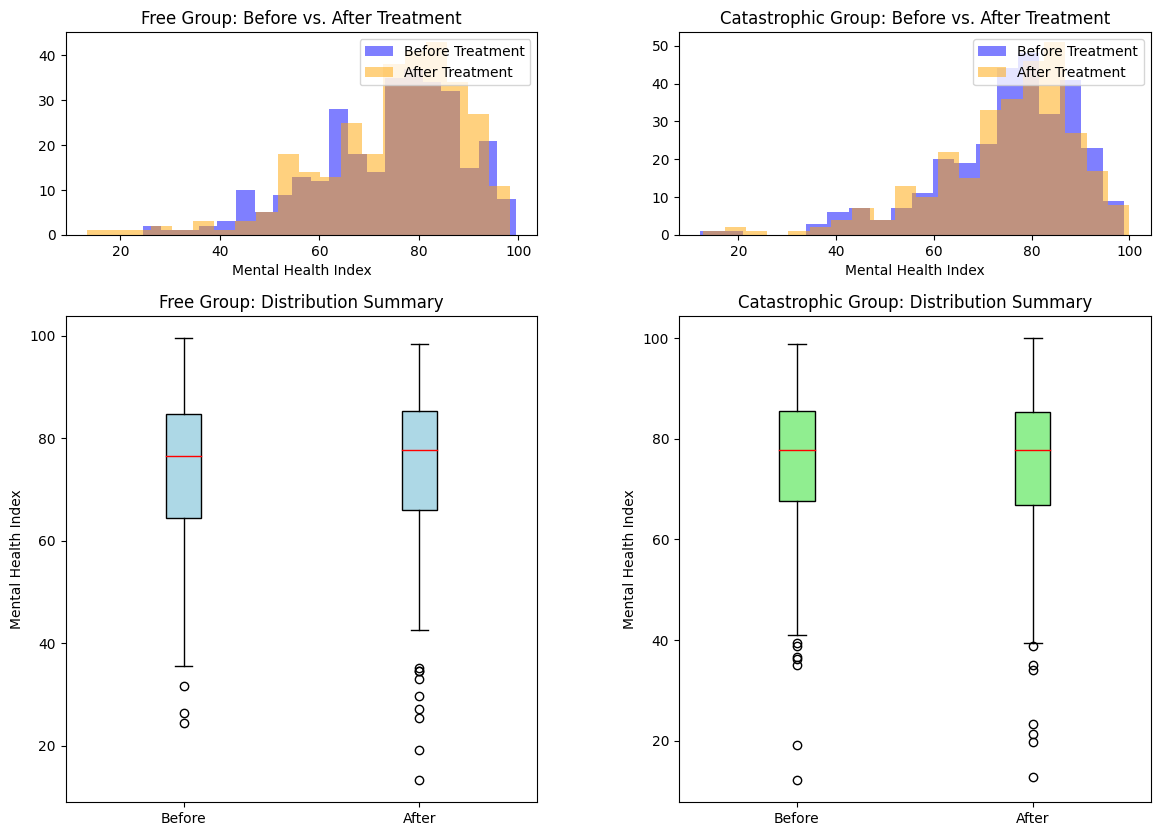

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure layout
fig = plt.figure(figsize=(14, 10))
grid = plt.GridSpec(3, 2, hspace=0.4, wspace=0.3)

# --- Histograms (Top Row) ---
# Free Group Histogram
ax1 = plt.subplot(grid[0, 0])
ax1.hist(df_free['mhi'], alpha=0.5, label='Before Treatment', color='blue', bins=20)
ax1.hist(df_free['mhix'], alpha=0.5, label='After Treatment', color='orange', bins=20)
ax1.legend(loc='upper right')
ax1.set_xlabel('Mental Health Index')
ax1.set_title('Free Group: Before vs. After Treatment')

# Catastrophic Group Histogram
ax2 = plt.subplot(grid[0, 1])
ax2.hist(df_coins['mhi'], alpha=0.5, label='Before Treatment', color='blue', bins=20)
ax2.hist(df_coins['mhix'], alpha=0.5, label='After Treatment', color='orange', bins=20)
ax2.legend(loc='upper right')
ax2.set_xlabel('Mental Health Index')
ax2.set_title('Catastrophic Group: Before vs. After Treatment')

# --- Boxplots (Bottom Row) ---
# Free Group Boxplot
ax3 = plt.subplot(grid[1:, 0])
box_data_free = [df_free['mhi'], df_free['mhix']]
ax3.boxplot(box_data_free, labels=['Before', 'After'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
ax3.set_ylabel('Mental Health Index')
ax3.set_title('Free Group: Distribution Summary')

# Catastrophic Group Boxplot
ax4 = plt.subplot(grid[1:, 1])
box_data_coins = [df_coins['mhi'], df_coins['mhix']]
ax4.boxplot(box_data_coins, labels=['Before', 'After'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='red'))
ax4.set_ylabel('Mental Health Index')
ax4.set_title('Catastrophic Group: Distribution Summary')

plt.tight_layout()
plt.show()

In [14]:
#Before treatment health index
# This is equivalen to our X_!, ..., X_N samples


#Free group
hind_free = df_free['mhi']
#Coinsurance group
hind_coins = df_coins['mhi']



#After treatment Health index
#Equivalent to our Y_1, ... , Y_N samples


#Free group
ahind_free = df_free['mhix']

#Coinsurance group
ahind_coins = df_coins['mhix']


#Developing kernel estimation for our before treatment groups
fx_hat_free = scipy.stats.gaussian_kde(hind_free)
fx_hat_coins = scipy.stats.gaussian_kde(hind_coins)

#Sampling from these two distributions
fx_sample_free = fx_hat_free.resample(1000)
fx_sample_coins = fx_hat_coins.resample(1000)

#KDE for after treament group
fy_hat_free = scipy.stats.gaussian_kde(ahind_free)
fy_hat_coins = scipy.stats.gaussian_kde(ahind_coins)

#Sampling for KDE (after treatment)
fy_sample_free = fy_hat_free.resample(1000)
fy_sample_coins = fy_hat_coins.resample(1000)


#Monte Carlo Overlap Estimation (FREE GROUP)
numerator_free = fx_hat_free(fy_sample_free) * fy_hat_free(fx_sample_free)
denom_free = fx_hat_free(fx_sample_free) * fy_hat_free(fy_sample_free)
alpha_free = np.minimum(1, (numerator_free / denom_free))
overlap_free = np.mean(alpha_free)

#Monte Carlo Overlap Estimation (COINSURANCE GROUP)
numerator_coins = fx_hat_coins(fy_sample_coins) * fy_hat_coins(fx_sample_coins)
denom_coins = fx_hat_coins(fx_sample_coins) * fy_hat_coins(fy_sample_coins)
alpha_coins = np.minimum(1, (numerator_coins / denom_coins))
overlap_coins = np.mean(alpha_coins)

In [15]:
print(f"Overlap measure for the free group: {overlap_free}")
print(f"Overlap measure for the catastrophic group: {overlap_coins}")
print(f"Overlap measure for the difference between the two groups: {abs(overlap_coins - overlap_free)}")

Overlap measure for the free group: 0.9300154351423845
Overlap measure for the catastrophic group: 0.9449068206379356
Overlap measure for the difference between the two groups: 0.014891385495551135


In [16]:
import scipy.stats


#Difference of the two groups

diff_free = ahind_free - hind_free
diff_coins = ahind_coins - hind_coins

tstat, pval = scipy.stats.ttest_ind(diff_free, diff_coins)
print("Difference of two groups")
print(f"Test statstic: {tstat}")
print(f"p-value: {pval}")

Difference of two groups
Test statstic: 0.8010285606897681
p-value: 0.4234332542089402


In [17]:
#Difference in treatment for free group
tstat_free, pval_free = scipy.stats.ttest_ind(hind_free, ahind_free)
print("Free group")
print(f"Test statstic: {tstat_free}")
print(f"p-value: {pval_free}")

Free group
Test statstic: -0.7264450936746981
p-value: 0.4678501993567493


In [18]:
#Difference in treatment for catastrophic group
tstat_cat, pval_cat = scipy.stats.ttest_ind(hind_coins, ahind_coins)
print("Catastrophic group")
print(f"Test statstic: {tstat_cat}")
print(f"p-value: {pval_cat}")

Catastrophic group
Test statstic: 0.05156255382399781
p-value: 0.9588944759518352


The analysis above used all individuals that were either in the free group or the catastrophic group. What it failed to consider were the possible differences of the indiviudals in the groupings.

For example, a person in the free group could've already had insurance before the treatment was applied and thus the treatment effect wouldn't be as significant as a person who previously had no insurance suddenly gaining free insurace.

Using the dataset avaiable, we want to try and control for as many of these vairables as possible while still using the overlap measure as our measure of similarity before and after treatment.

The way we'll do this is by subsetting the population based on the following qualities:
1. Age
2. Race
3. Gender
4. Income
5. General Health Index before treatment
6. Insurance status before treatment.

We'll measure the overlap effect for the free and catastrophic group  and report the findings in a datatframe.


Alternative idea: use K-Means clustering to cluster the sample, reduce dimensionality for visualization, highlight people who received different treatments across the different clusters, compute overlap of these people within each cluster.

In [ ]:
"""
APPROACH 1: SUBSETTING DATA
"""




df_free.head()

,person,site,instat,bfamily,bhh,xperson,baseld,enrterm,enrdate,annd,...,cap,capx,pfi,pfix,mhi,mhix,ghindx,ghindxx,merge2,merge3
5737,MH309698,Georgetown County,1.0,KH12057A,JH017367,MH309718,19760503,3.0,19790101,101,...,100.0,100.000000,5.0,5.0,89.900002,83.000000,86.400002,77.300003,matched (3),matched (3)
1034,MB25403A,Seattle,1.0,KB101800,JB001693,MB25403A,19750723,5.0,19760301,301,...,100.0,83.300003,5.0,4.0,89.900002,61.200001,85.199997,53.400002,matched (3),matched (3)
4015,MF267952,Franklin County,1.0,KF106221,JF005748,MF267952,19751119,3.0,19760801,801,...,100.0,100.000000,5.0,5.0,60.099998,72.900002,80.699997,69.300003,matched (3),matched (3)
3585,ME276291,Fitchburg,1.0,KE109239,JE008329,ME276291,19760124,5.0,19760801,801,...,100.0,100.000000,5.0,5.0,52.099998,83.500000,56.799999,67.000000,matched (3),matched (3)
3057,MB31352A,Seattle,1.0,KB126542,JB022614,MB31352A,19751115,3.0,19760501,501,...,100.0,100.000000,5.0,5.0,89.400002,96.800003,89.800003,86.400002,matched (3),matched (3)


/Users/cristianzuniga/Library/Python/3.10/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cristianzuniga/Library/Python/3.10/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cristianzuniga/Library/Python/3.10/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cristianzuniga/Library/Python

<AxesSubplot: xlabel='mhi', ylabel='Count'>

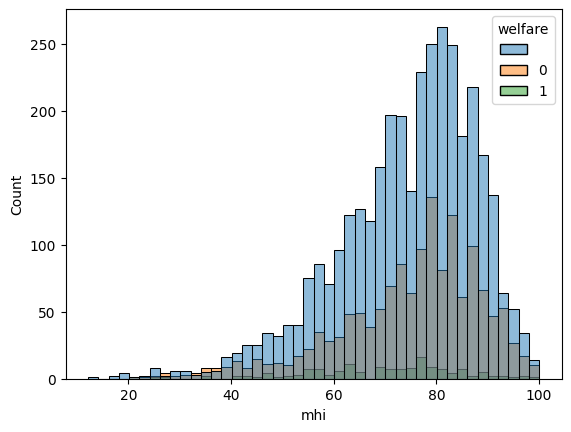

In [36]:
sn.histplot(data=df_rand, x='mhi', hue='welfare')

In [39]:
pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.4/586.4 kB 6.1 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pyreadstat
df_rand, meta = pyreadstat.read_dta("/Users/cristianzuniga/Downloads/randdata.dta")
df_rand

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
0,3.0,1.0,100.0,0.0,1.0,125024.0,1.0,13748.759766,42.877480,0.0,...,0.000000,0.000000,1.0,0.0,0.0,65.207802,9.528776,1.386294,2.134299,1.0
1,3.0,1.0,100.0,0.0,2.0,125024.0,1.0,13748.759766,43.877480,0.0,...,0.000000,0.000000,1.0,0.0,0.0,65.207802,9.528776,1.386294,4.128351,1.0
2,3.0,1.0,100.0,0.0,3.0,125024.0,1.0,13748.759766,44.877480,0.0,...,0.000000,0.000000,1.0,0.0,0.0,65.207802,9.528776,1.386294,NaN,0.0
3,3.0,1.0,100.0,0.0,4.0,125024.0,1.0,13748.759766,45.877480,0.0,...,0.000000,0.000000,1.0,0.0,0.0,65.207802,9.528776,1.386294,NaN,0.0
4,3.0,1.0,100.0,0.0,5.0,125024.0,1.0,13748.759766,46.877480,0.0,...,0.000000,0.000000,1.0,0.0,0.0,65.207802,9.528776,1.386294,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,11.0,6.0,0.0,0.0,2.0,632073.0,0.0,6735.315918,0.403149,1.0,...,0.000000,0.000000,0.0,0.0,0.0,70.689949,8.815269,1.945910,2.939512,1.0
20186,11.0,6.0,0.0,0.0,3.0,632073.0,0.0,6735.315918,1.403149,1.0,...,0.000000,0.000000,0.0,0.0,0.0,70.689949,8.815269,2.079442,NaN,0.0
20187,18.0,6.0,25.0,0.0,3.0,632075.0,0.0,7493.087402,0.305270,0.0,...,3.258096,8.006368,0.0,0.0,0.0,70.689949,8.921869,1.609438,6.368620,1.0
20188,18.0,6.0,25.0,0.0,3.0,632166.0,0.0,1896.569336,0.056126,0.0,...,3.258096,6.542472,0.0,0.0,0.0,70.689949,7.548329,1.791759,4.201745,1.0


In [42]:
df_rand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20190 entries, 0 to 20189
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   plan      20190 non-null  float64
 1   site      20190 non-null  float64
 2   coins     20190 non-null  float64
 3   tookphys  20190 non-null  float64
 4   year      20190 non-null  float64
 5   zper      20190 non-null  float64
 6   black     20190 non-null  float64
 7   income    20190 non-null  float64
 8   xage      20190 non-null  float64
 9   female    20190 non-null  float64
 10  educdec   20186 non-null  float64
 11  time      20190 non-null  float64
 12  outpdol   20190 non-null  float64
 13  drugdol   20190 non-null  float64
 14  suppdol   20190 non-null  float64
 15  mentdol   20190 non-null  float64
 16  inpdol    20190 non-null  float64
 17  meddol    20190 non-null  float64
 18  totadm    20190 non-null  float64
 19  inpmis    20190 non-null  float64
 20  mentvis   20190 non-null  fl

In [46]:
df_rand.head()

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
0,3.0,1.0,100.0,0.0,1.0,125024.0,1.0,13748.759766,42.87748,0.0,...,0.0,0.0,1.0,0.0,0.0,65.207802,9.528776,1.386294,2.134299,1.0
1,3.0,1.0,100.0,0.0,2.0,125024.0,1.0,13748.759766,43.87748,0.0,...,0.0,0.0,1.0,0.0,0.0,65.207802,9.528776,1.386294,4.128351,1.0
2,3.0,1.0,100.0,0.0,3.0,125024.0,1.0,13748.759766,44.87748,0.0,...,0.0,0.0,1.0,0.0,0.0,65.207802,9.528776,1.386294,NaN,0.0
3,3.0,1.0,100.0,0.0,4.0,125024.0,1.0,13748.759766,45.87748,0.0,...,0.0,0.0,1.0,0.0,0.0,65.207802,9.528776,1.386294,NaN,0.0
4,3.0,1.0,100.0,0.0,5.0,125024.0,1.0,13748.759766,46.87748,0.0,...,0.0,0.0,1.0,0.0,0.0,65.207802,9.528776,1.386294,NaN,0.0


In [48]:
df_rand.zper.nunique()

5912